# Likelihood and REML

We will again use a jupyter notebook as a calculator.

## Example 1
Suppose $y\stackrel{\mathrm{iid}}\sim N(\mu, \sigma_e^2)$, and we have an observation vector:
$\mathbf{y} = \begin{bmatrix}11\\ 7 \\ 12\end{bmatrix}$. What are maximal likelihood (ML) estimates of $\mu$ and $\sigma_e^2$?

In [10]:
using Statistics, Distributions, DataFrames, StatsPlots, LaTeXStrings

In [2]:
y = [11, 7, 12]

3-element Vector{Int64}:
 11
  7
 12

In [5]:
m = mean(y)

10.0

In [7]:
s = std(y)

2.6457513110645907

In [9]:
points = DataFrame(μ=Float64[], σ=Float64[], pd=Float64[])

for μ in m-1:.01:m+1
    for σ in s-1:.01:s+1
        pd = prod(pdf.(Normal(μ, σ), y))
        push!(points, [μ σ pd])
    end
end
first(points, 5)

,μ,σ,pd
,Float64,Float64,Float64
1,9.0,1.64575,0.000617595
2,9.0,1.65575,0.000629831
3,9.0,1.66575,0.000641945
4,9.0,1.67575,0.000653929
5,9.0,1.68575,0.000665777


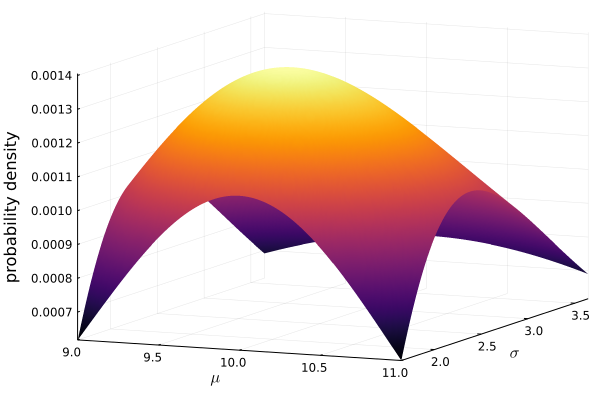

In [13]:
@df points plot(:μ, :σ, :pd, st=:surface,
                xlabel = L"\mu",
                ylabel = L"\sigma",
                zlabel = "probability density",
                legend = false)

In [14]:
last(sort(points, :pd))

,μ,σ,pd
,Float64,Float64,Float64
40401,10.0,2.15575,0.00140531


Above function find the peak of the hill in our plot. We can see that the peak is not at $\sigma=s$. This is because that ML estimation is biased. Here $\hat{\sigma}\approx \sqrt{\frac{2s}{3}}$.